# **Bioinformatics Project - Computational Drug Discovery for Breast Cancer**

This is a real-life Data Science and Machine Learning Model and in this model we will be building machine learning model using ChEMBL bioactivity data.

**In this Part we will build a Regression Model of Acromatase Inhibitors using the Random Forest Algorithm.**

**NOTE:** What is the difference between Lipinski Descriptors and PubChem Fingerprints?

The difference between these two is that the Lipinski Descriptors gives us the general simple overview of molecule that has drug like properites like MW, LogP, NumHDonors, NumHAcceptors which are the Global features of the molecules.

And on the other hand, the PubChem Fingerprints describes the local features of the molecule and will be using PubChem Fingerprints for the model building. PubChem consists of the unique structure of the molecules and design of the molecules which leads to drug discovery, **in order to generate the highest potency of the drug**. So the molecule/drug is not toxic and safe to use.

## Import Libraries

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Load the Dataset from **Part 3**

**So here we will see that the Aromatase Data Set has 881 PubChem (Input Features) and 1 pIC50 (Output Variable).**

In [37]:
df2 = pd.read_csv('aromatase_02_bioactivity_data_3class_pIC50_1.csv')

In [38]:
# Put PubChem Values in the X variable and pIC50 values in the Y variable

# INPUT FEATURES -->
X = df2.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2832,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2833,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2834,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# OUTPUT FEATURES -->
Y = df2.pIC50
Y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
2831    5.102373
2832    5.431798
2833    5.619789
2834    7.638272
2835    9.000000
Name: pIC50, Length: 2835, dtype: float64

In [40]:
X.shape

(2835, 881)

In [41]:
Y.shape

(2835,)

## Remove the Low Variance Features

In [42]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1 - .8)))
X = selection.fit_transform(X)

In [43]:
X.shape

(2835, 151)

## Data Split (80/20 Ratio)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [45]:
X_train.shape, Y_train.shape

((2268, 151), (2268,))

In [46]:
X_test.shape, Y_test.shape

((567, 151), (567,))

## Building a Regression Model using Random Forest Algorithm

In [53]:
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.39484589535558223

In [54]:
Y_pred = model.predict(X_test)

## Scatter Plot of Experimental vs Predicted pIC50 Values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


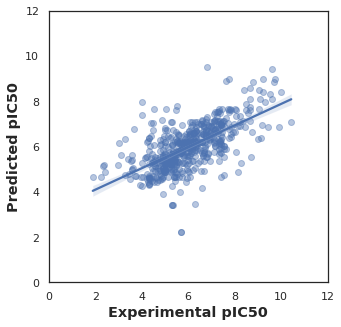

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show
plt.savefig('plot_predicted_experimented.pdf')